# INTRODUCTION

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

- Matplotlib is the most popular plotting library for python
- It gives control over every aspect of a figure
- It was designed to have a similar feel to MatLab's graphical plotting

Installation

`conda install matplotlib` 

or

`pip install matplotlib`

Official website: https://matplotlib.org/

Gallery: https://matplotlib.org/stable/gallery/index.html

Basic Commands and Common Functions: https://matplotlib.org/stable/api/pyplot_summary.html 

Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

That line is only for jupyter notebooks, if you are using another editor, you'll use: `plt.show()` at the end of all your plotting commands to have the figure pop up in another window.

**Note: Notebook is configured to use the inline backend by default. In that case you don't need to set it again.**


# MATPLOTLIB PART - 1

# Basic Example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

Data we want to plot

In [4]:
import numpy as np

x = np.linspace(1,10,10)
y = x ** 2

print(x)
print(y)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]


# Functional method of plotting

Text(0.5, 1.0, 'String title here')

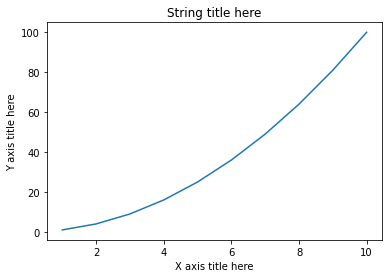

In [5]:
plt.plot(x,y) # third argument is color
plt.xlabel('X axis title here')
plt.ylabel('Y axis title here')
plt.title('String title here')

# Creating Multiplots on Same Canvas

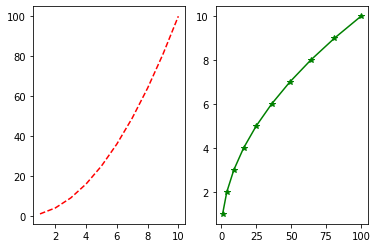

In [6]:
# args - num of rows, num of cols, plot number we are working on
plt.subplot(1,2,1)
plt.plot(x,y,'r--')  # third argument is color

plt.subplot(1,2,2)
plt.plot(y,x,'g*-')

# Matplotlib Object Oriented Method

Object oriented API method of plotting - we will instantiate figure objects and then call methods and attributes from that object.

This approach is nicer when dealing with a canvas that has multiple plots on it.

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'plot title string')

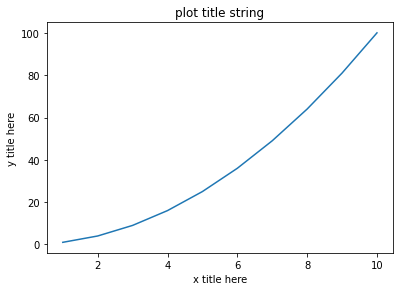

In [7]:
fig = plt.figure() # Figure object gets created- just creates an empty canvas
# we can think of this as imaginary blank canvas

# Add set of axes to figure
axes = fig.add_axes([0.1,0.1,0.8,0.8]) #left, bottom, width, and height

axes.plot(x,y)
axes.set_xlabel('x title here')
axes.set_ylabel('y title here')
axes.set_title('plot title string')

Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

Text(0.5, 1.0, 'SMALLER PLOT')

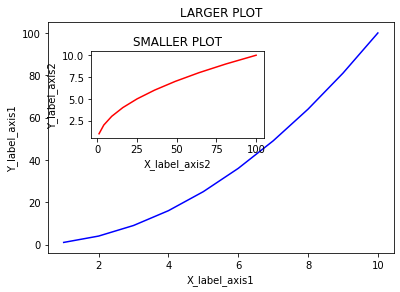

In [8]:
# creates blank canvas
fig = plt.figure()

# axis1 - left, bottom, width, and height of the axis w.r.t empty canvas created in the previous line of code
# all the values in the list are in relation with empty canvas
# all the values in the list must be between 0 and 1

axis1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
axis2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) 

# Interpretation of arg:
# bottom of axis2 starts 20% from the left of empty canvas
# 50% from the bottom of the empty canvas
# It takes 40% of the canvas size and width
# and 30% of the canvas size and height

# excercise: Get the subplot to the bottom right of the larger plot
# axis2 = fig.add_axes([0.5, 0.1, 0.4, 0.3])

# Larger Figure Axes 1
axis1.plot(x,y,'b')
axis1.set_xlabel('X_label_axis1')
axis1.set_ylabel('Y_label_axis1')
axis1.set_title('LARGER PLOT')

# Insert Figure Axes 2
axis2.plot(y,x,'r')
axis2.set_xlabel('X_label_axis2')
axis2.set_ylabel('Y_label_axis2')
axis2.set_title('SMALLER PLOT')

# MATPLOTLIB - PART 2

Creating subplots using object oriented method

## subplots()

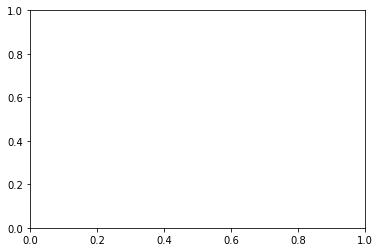

In [9]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots() # empty canvas, tuple unpacking

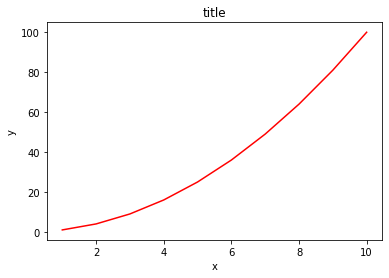

In [10]:
# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

fig

Then you can specify the number of rows and columns when creating the subplots() object:

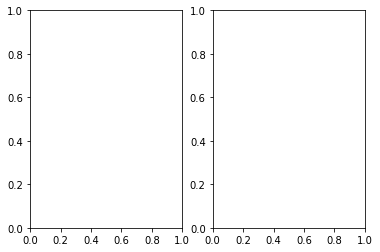

In [11]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2) 
# This is similar to calling fig.add_axes() automatically based on the arguments 
# nrows and ncols.

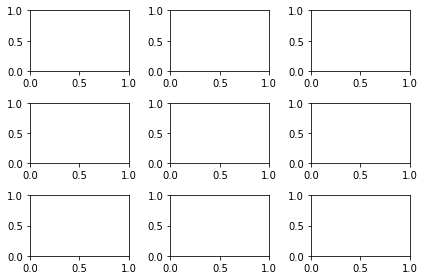

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3) # plot is overlapping

plt.tight_layout() # for fixing the overlap
# it is recommended to put this at the end of all plot statements

In [13]:
axes # axes is just an array of axis objects

# we can iterate over this object (or) access individual axis based on index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cdd4c74d0>,
      dtype=object)

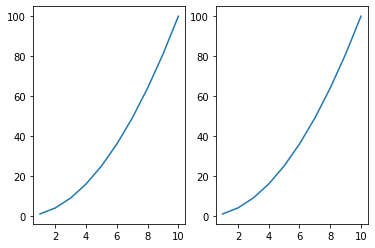

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# we iterate over axes - its just a list of <matplotlib.axes._subplots.AxesSubplot> object
for axis in axes:
  axis.plot(x,y)

Text(0.5, 1.0, 'Second Plot')

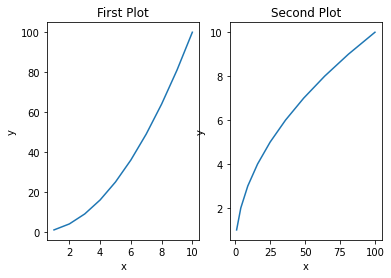

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# we can also index axes array
axes[0].plot(x,y)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('First Plot')

axes[1].plot(y,x)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Second Plot')

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

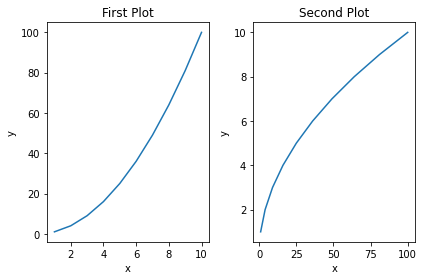

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# we can also index axes array
axes[0].plot(x,y)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('First Plot')

axes[1].plot(y,x)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Second Plot')
  
plt.tight_layout()

# Figure size and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

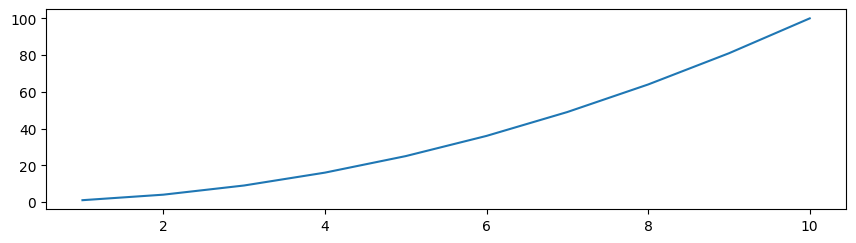

In [17]:
fig = plt.figure(figsize=(8,2), dpi=100) 

# figsize tuple: width and height in inches
# dpi (dots per inch (or) pixels per inch): default 100

axis1 = fig.add_axes([0,0,1,1])
axis1.plot(x,y)

The same arguments can also be passed to layout managers, such as the `subplots()` function:

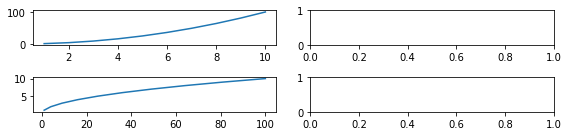

In [18]:
fig, axes = plt.subplots(figsize=(8,2), nrows=2, ncols=2)

axes[0,0].plot(x,y)
axes[1,0].plot(y,x)

plt.tight_layout() # it will attempt its best to fix the layout

# Saving the Figure

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF.

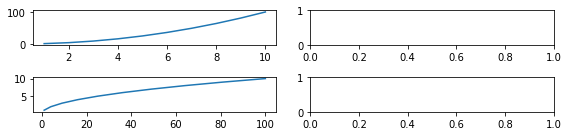

In [19]:
fig

To save a figure to a file we can use the `savefig()` method in the `Figure` class:

Here we can also optionally specify the DPI and choose between different output formats:

In [20]:
fig.savefig('my_picture.pdf', dpi=200)

# Legends

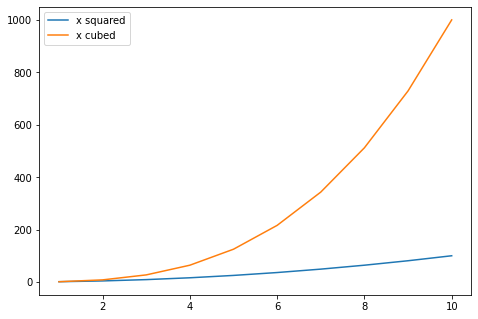

In [21]:
fig = plt.figure()

axis = fig.add_axes([0,0,1,1])
axis.plot(x,x**2, label='x squared')
axis.plot(x,x**3, label='x cubed')


# its little confusing as to what each plot represents. You would want to add 
# in a legend in an order. its a two step process:
# 1. call the legend() method 
# 2. label argument should be added

axis.legend(loc='best') 

Notice how are legend overlaps some of the actual plot!

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](https://matplotlib.org/stable/api/legend_api.html?highlight=legend%20guide) for details. Some of the most common **loc** values are:



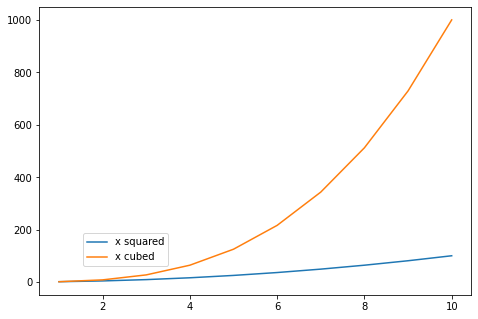

In [22]:
axis.legend(loc=(0.1,0.1)) # tuple specifying the location of label's bottom corner
fig 

# MATPLOTLIB PART - 3

Setting colors, line with line types, and customizing the options of how plot actually looks.

# Plot Appearance - Setting Colors

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the color and alpha keyword arguments. Alpha indicates opacity.

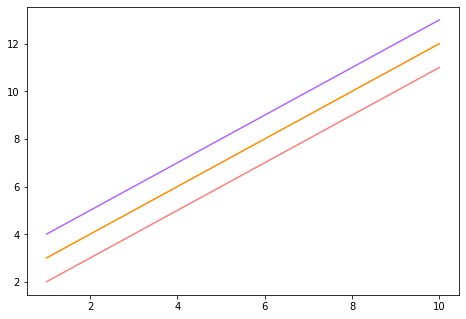

In [30]:
from re import A
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.plot(x, x+1, color='red', alpha=0.5) #half transparent
axis.plot(x, x+2, color='#FF8C00')
axis.plot(x, x+3, color='#B266FF')

# color parameter takes multiple arguments
#1. common/basic color strings - red, blue, purple, orange, green, etc.,
#2. RGB Hex Code

# Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  del sys.path[0]


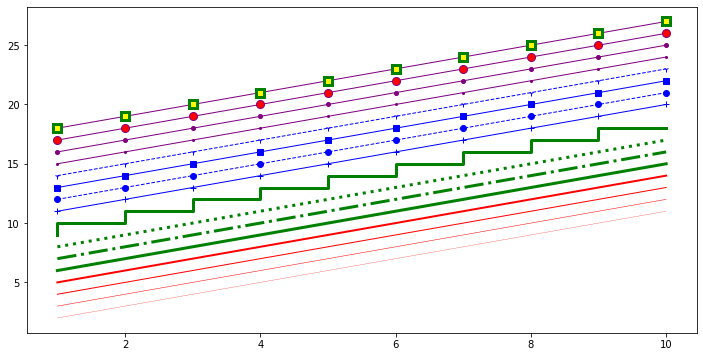

In [62]:
fig, axes = plt.subplots(figsize=(12,6))

# line width
axes.plot(x, x+1, color='red', linewidth=0.25)
axes.plot(x, x+2, color='red', linewidth=0.50)
axes.plot(x, x+3, color='red', linewidth=1.00)
axes.plot(x, x+4, color='red', linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
axes.plot(x, x+5, color='green', lw=3, linestyle='-')
axes.plot(x, x+6, color='green', lw=3, linestyle='-.')
axes.plot(x, x+7, color='green', lw=3, ls=':')
axes.plot(x, x+8, color='green', lw=3, ls='steps')

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
axes.plot(x, x+10, color='blue', lw=1, ls='-', marker='+')
axes.plot(x, x+11, color='blue', lw=1, ls='--', marker='o') # circles
axes.plot(x, x+12, color='blue', lw=1, ls='-', marker='s') # squares
axes.plot(x, x+13, color='blue', lw=1, ls='--', marker='1')

# marker size and color
axes.plot(x, x+14, color='purple', lw=1, ls='-', marker='o', markersize=2)
axes.plot(x, x+15, color='purple', lw=1, ls='-', marker='o', markersize=4)
axes.plot(x, x+16, color='purple', lw=1, ls='-', marker='o', markersize=8, 
          markerfacecolor='red')
axes.plot(x, x+17, color='purple', lw=1, ls='-', marker='s', markersize=8, 
          markerfacecolor='yellow', markeredgewidth=3, markeredgecolor='green')

# Plot Range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes ranges:

Text(0.5, 1.0, 'custome axes range')

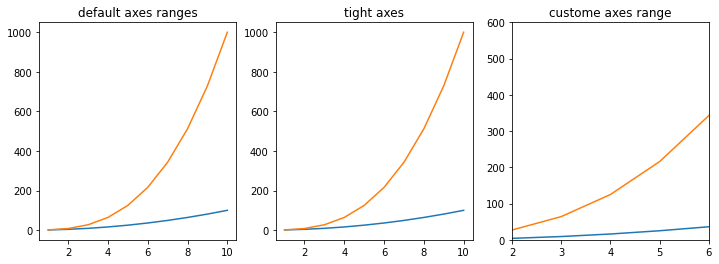

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4)) # empty canvas

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title('default axes ranges')

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title('tight axes')

axes[2].plot(x, x**2, x**3)
axes[2].set_ylim(0,600)
axes[2].set_xlim(2,6)
axes[2].set_title('custome axes range')



# Special Plot Types

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

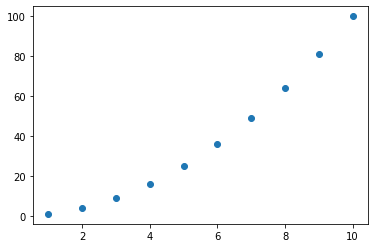

In [74]:
plt.scatter(x,y)

In [76]:
from random import sample

data = sample(range(1,1000),100)
print(data)

[179, 734, 3, 888, 466, 795, 624, 620, 65, 121, 829, 209, 998, 502, 208, 784, 662, 286, 247, 206, 294, 614, 682, 498, 414, 228, 788, 753, 277, 191, 20, 875, 491, 860, 469, 863, 244, 199, 282, 496, 868, 644, 285, 684, 893, 952, 953, 453, 808, 720, 204, 423, 883, 902, 283, 637, 820, 333, 661, 118, 905, 495, 246, 866, 791, 264, 346, 815, 628, 891, 603, 634, 884, 432, 826, 796, 544, 584, 415, 730, 511, 434, 352, 31, 113, 296, 350, 181, 334, 146, 501, 399, 932, 903, 67, 2, 709, 227, 571, 869]


(array([ 6.,  8., 17.,  6., 12.,  6., 12., 10., 16.,  7.]),
 array([  2. , 101.6, 201.2, 300.8, 400.4, 500. , 599.6, 699.2, 798.8,
        898.4, 998. ]),
 <a list of 10 Patch objects>)

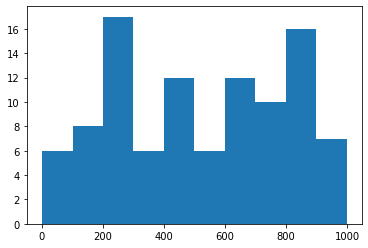

In [78]:
plt.hist(data)

In [98]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]
# np.random.normal() - Draw random samples from a normal (Gaussian) distribution
# s = np.random.normal(mu, sigma, 1000) # mean, standard deviation, sample size

# data is a 2d array - 3 rows 100 columns
print(data[1])
print(len(data[1]))

[ 0.29373267 -0.48353468  1.66184498  1.4904572  -1.29396251 -2.78521955
 -3.45803713 -2.10965014 -2.53540223  1.73723735  1.41459434  0.34513713
  0.76292008 -2.45118446  0.43303676 -4.040428    0.2684582   1.94481445
 -1.46135705 -1.59689786 -0.45743355 -0.3427151  -0.93099929  0.0931601
 -0.26918565 -1.53172797  2.37673595 -1.06079024 -1.78275837 -3.17305064
  1.39467906 -0.39760673 -1.37583382 -0.44363489  1.57038794 -1.21303376
 -1.50975695  0.92970937  3.24308738 -2.44580793  1.03485356  0.72504468
 -0.92628161 -1.39754426 -0.89186933  4.07297477  0.27841738  2.17523411
 -1.76144525  0.23563521  1.09690882 -1.29702165  1.27774748  0.13408311
  0.12749381  1.11746588 -2.01442821 -2.3177058  -1.42906262 -0.2908849
  1.98149475 -1.73372438 -1.72936908 -1.75811433 -1.18480153  1.01670717
 -0.15391642 -2.94715286 -1.38919496 -0.60410125  0.15556549  0.34198833
  1.56184275  2.59762099 -0.51720706  1.86267831 -0.31951792 -1.23997646
 -2.00943131  1.45715285 -1.17990067  1.15362573  2.1

{'boxes': [<matplotlib.patches.PathPatch at 0x7f4ccdfddc90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4ccdff02d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4ccdff7310>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4ccdff0d50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4ccdfea7d0>,
  <matplotlib.lines.Line2D at 0x7f4ccdf94250>]}

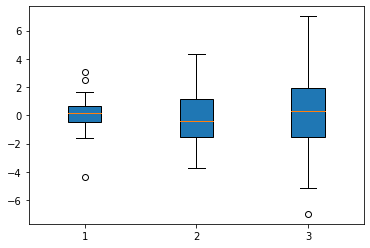

In [92]:
plt.boxplot(data, vert=True, patch_artist=True)